# Exploratory Data Analysis

## Import necessary packages

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

from dataset import Dataset
from dataset_constants import *

In [28]:
# Run when dataset_constants has been updated
# import importlib
# import dataset_constants
# importlib.reload(dataset_constants) # reload to update changes to the file
# from dataset_constants import *

## Constants

In [2]:
RANDOM_SEED = 0

## Load the Hate Speech Filipino dataset

In [29]:
dataset = Dataset(full_data_path=CLEANED_DATASET_PATH,
                  from_scratch=False,
                  split_sizes=split_sizes_cleaned)
dataset.build()

X_train = dataset.get_features(split_type="train")
Y_train = dataset.get_labels(split_type="train")
X_val = dataset.get_features(split_type="val")
Y_val = dataset.get_labels(split_type="val")
X_test = dataset.get_features(split_type="test")
Y_test = dataset.get_labels(split_type="test")

Data loaded from cleaned_dataset.pkl


In [30]:
# Count lengths of each set
print(len(X_train))
print(len(Y_train))
print(len(X_val))
print(len(Y_val))
print(len(X_test))
print(len(Y_test))

8674
8674
3859
3859
3976
3976


## Convert to pandas dataframes and inspect

In [31]:
train_df = pd.DataFrame(
    {'tweets': X_train,
     'label': Y_train
    })

train_df.head()

,tweets,label
0,inaasahan vice president jejomar binay taong,0
1,mar roxas tang ina tuwid daan daw eh sya nga s...,1
2,salamat sawang suporta taga makati pagbabalik ...,0
3,putangina mo binay takbo,1
4,binay selective amnesia forgetting past six ye...,0


In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8674 entries, 0 to 8673
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  8674 non-null   object
 1   label   8674 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 135.7+ KB


In [33]:
val_df = pd.DataFrame(
    {'tweets': X_val,
     'label': Y_val
    })

val_df.head()

,tweets,label
0,hndi one chance saka binay fb haist,1
1,mar roxas addressing crowd gathered pasay city...,0
2,perfect makaharap duterte binay makatikim mura,0
3,onlybinaypriority4ps nating hayaan maloko puli...,0
4,regards advertistment binay haha,0


In [34]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3859 entries, 0 to 3858
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  3859 non-null   object
 1   label   3859 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.4+ KB


In [35]:
test_df = pd.DataFrame(
    {'tweets': X_test,
     'label': Y_test
    })

test_df.head()

,tweets,label
0,unshaded votes votes mayor duterte goes mar ro...,1
1,nomorechance,1
2,well good choices like duterte poe still undec...,0
3,nognog pandak laki hirap corrupt binay,1
4,exbinay aide turns tables mercado,0


In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  3976 non-null   object
 1   label   3976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.3+ KB


## Hate Speech Count per Set

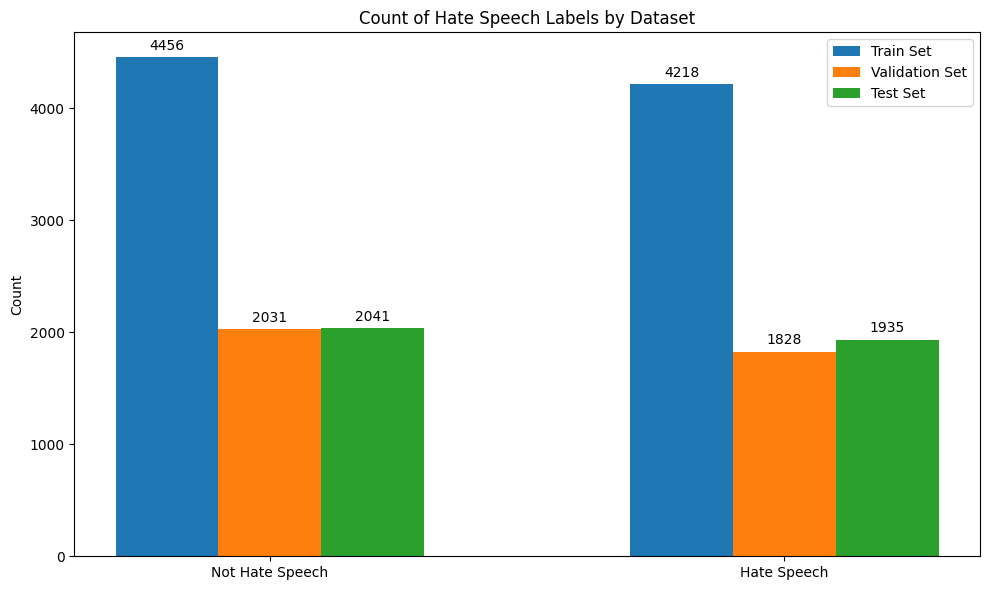

In [37]:
# Count occurrences of 0s and 1s for each set
train_counts = train_df['label'].value_counts()
validation_counts = val_df['label'].value_counts()
test_counts = test_df['label'].value_counts()

# Plotting
labels = ['Not Hate Speech', 'Hate Speech']
x = np.arange(len(labels))
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each set
train_bars = ax.bar(x - width, train_counts, width, label='Train Set', color='tab:blue')
validation_bars = ax.bar(x , validation_counts, width, label='Validation Set', color='tab:orange')
test_bars = ax.bar(x + width, test_counts, width, label='Test Set', color='tab:green')

# Add labels, title, and legend
ax.set_ylabel('Count')
ax.set_title('Count of Hate Speech Labels by Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(train_bars)
add_labels(validation_bars)
add_labels(test_bars)

plt.tight_layout()
plt.show()

## Add Length and Word Counts to Train Set

In [38]:
train_df['length'] = train_df['tweets'].apply(len)
train_df['word_counts'] = train_df['tweets'].apply(lambda x:len(str(x).split()))

train_df.head()

,tweets,label,length,word_counts
0,inaasahan vice president jejomar binay taong,0,44,6
1,mar roxas tang ina tuwid daan daw eh sya nga s...,1,53,11
2,salamat sawang suporta taga makati pagbabalik ...,0,83,9
3,putangina mo binay takbo,1,24,4
4,binay selective amnesia forgetting past six ye...,0,96,11


## Plot most common words

### Overall

In [40]:
from collections import Counter

train_df['temp_list'] = train_df['tweets'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['common_words','count']
temp.style.background_gradient(cmap='Blues')

,common_words,count
0,binay,5351
1,roxas,2714
2,mar,2235
3,duterte,1119
4,poe,990
5,mo,640
6,vp,612
7,grace,320
8,president,317
9,miriam,302


In [41]:
train_df

,tweets,label,length,word_counts,temp_list
0,inaasahan vice president jejomar binay taong,0,44,6,"[inaasahan, vice, president, jejomar, binay, t..."
1,mar roxas tang ina tuwid daan daw eh sya nga s...,1,53,11,"[mar, roxas, tang, ina, tuwid, daan, daw, eh, ..."
2,salamat sawang suporta taga makati pagbabalik ...,0,83,9,"[salamat, sawang, suporta, taga, makati, pagba..."
3,putangina mo binay takbo,1,24,4,"[putangina, mo, binay, takbo]"
4,binay selective amnesia forgetting past six ye...,0,96,11,"[binay, selective, amnesia, forgetting, past, ..."
...,...,...,...,...,...
8669,kaninang itong binay binay binaytch,1,35,5,"[kaninang, itong, binay, binay, binaytch]"
8670,mar roxas rise w momentum machinery grassroots...,0,96,13,"[mar, roxas, rise, w, momentum, machinery, gra..."
8671,alan cayetano confirms palace roxas poe behind...,0,89,13,"[alan, cayetano, confirms, palace, roxas, poe,..."
8672,mas nakakainis ad mar binay,1,27,5,"[mas, nakakainis, ad, mar, binay]"


### Tweets with Hate Speech

In [42]:
hate_df = train_df.loc[train_df['label'] == 1,:]

hate_df['temp_list'] = hate_df['tweets'].apply(lambda x:str(x).split())
top = Counter([item for sublist in hate_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['common_words','count']
temp.style.background_gradient(cmap='Reds')

/var/folders/dk/zhw4_3kn6cb029559dwjrmt40000gn/T/ipykernel_24084/3644971088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_df['temp_list'] = hate_df['tweets'].apply(lambda x:str(x).split())


,common_words,count
0,binay,2637
1,roxas,1393
2,mar,1193
3,mo,473
4,duterte,460
5,poe,377
6,nognog,263
7,ad,213
8,commercial,206
9,eh,199


### Tweets without Hate Speech

In [44]:
no_hate_df = train_df.loc[train_df['label'] == 0,:]

no_hate_df['temp_list'] = no_hate_df['tweets'].apply(lambda x:str(x).split())
top = Counter([item for sublist in no_hate_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')

/var/folders/dk/zhw4_3kn6cb029559dwjrmt40000gn/T/ipykernel_24084/3077780050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_hate_df['temp_list'] = no_hate_df['tweets'].apply(lambda x:str(x).split())


,Common_words,count
0,binay,2714
1,roxas,1321
2,mar,1042
3,duterte,659
4,poe,613
5,vp,456
6,via,267
7,president,214
8,miriam,204
9,grace,182


## Word Clouds

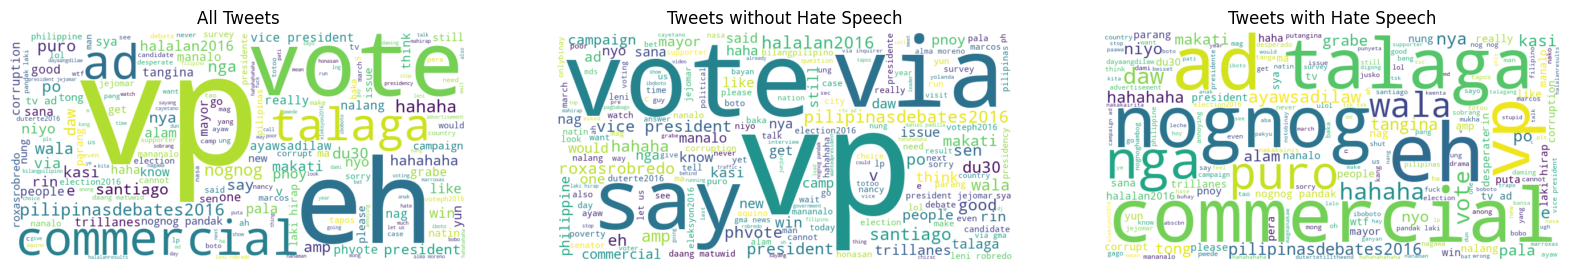

In [61]:
# Exclude the following stopwords from the word cloud
new_stopwords = {'mar','roxas','binay','duterte','mar roxas','poe','grace','miriam','mo'}

# Generate a word cloud for the entire dataset
all_text = ' '.join(train_df['tweets'])
wordcloud_all = WordCloud(width=800, height=400, background_color='white', stopwords = new_stopwords).generate(all_text)

# Generate word clouds for each segment (label 0 and label 1)
label_0_text = ' '.join(train_df[train_df['label'] == 0]['tweets'])
wordcloud_label_0 = WordCloud(width=800, height=400, background_color='white', stopwords = new_stopwords).generate(label_0_text)

label_1_text = ' '.join(train_df[train_df['label'] == 1]['tweets'])
wordcloud_label_1 = WordCloud(width=800, height=400, background_color='white', stopwords = new_stopwords).generate(label_1_text)

# Plotting the word clouds
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('All Tweets')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_label_0, interpolation='bilinear')
plt.title('Tweets without Hate Speech')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_label_1, interpolation='bilinear')
plt.title('Tweets with Hate Speech')
plt.axis('off')

plt.show()


## Topic Modelling - BERTopic

We do initial topic modeling using BERTopic.

In [ ]:
from bertopic import BERTopic

In [68]:
topic_model = BERTopic(nr_topics='auto')
topics, probs = topic_model.fit_transform(train_df['tweets'])

In [69]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3396,-1_binay_poe_roxas_duterte,"[binay, poe, roxas, duterte, mar, vp, miriam, ...","[man manalo miriam duterte sana roxas manalo, ..."
1,0,3382,0_mar_roxas_mo_binay,"[mar, roxas, mo, binay, commercial, vp, talaga...",[parang tanga commercial binay nanay oo nga pa...
2,1,126,1_ad_annoying_ads_political,"[ad, annoying, ads, political, campaign, tv, c...","[binay nognog ad annoying, binay ad annoying f..."
3,2,118,2_pandak_laki_nognog_hirap,"[pandak, laki, nognog, hirap, nog, nagawa, mar...","[pandak nognog laki hirap binay hahahaha, haha..."
4,3,100,3_roxas_vacant_binay_sandro,"[roxas, vacant, binay, sandro, baste, basta, r...",[nakauna baste asks sandro nods shyly sandro s...
...,...,...,...,...,...
60,59,11,59_visit_isabela_police_presence,"[visit, isabela, police, presence, agoo, provi...",[police presence provided pers station visit v...
61,60,11,60_dayaangdilaw_dayaanmoves_dayaan_top2,"[dayaangdilaw, dayaanmoves, dayaan, top2, vvvv...",[omg mar roxas baka maabutan million duterte d...
62,61,11,61_bobo_boboto_year_tuneofonlybinay,"[bobo, boboto, year, tuneofonlybinay, b2, yes,...","[bobo binay yes nga, bobo mo binay, yes nalang..."
63,62,11,62_rappler_apology_apologized_raises,"[rappler, apology, apologized, raises, apologi...",[mar roxas demand rappler meme apology yes bad...


In [70]:
topic_model.visualize_topics() # reduce to 14 topics

In [71]:
topic_model.reduce_topics(train_df['tweets'], nr_topics=14)
topic_model.visualize_topics() 

In [72]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3396,-1_binay_roxas_mar_poe,"[binay, roxas, mar, poe, duterte, vp, mo, miri...","[binay poe roxas santiago miriam2016, grace po..."
1,0,3638,0_roxas_mar_binay_mo,"[roxas, mar, binay, mo, commercial, vp, talaga...","[wala vp binay, mar roxas president ayawsadila..."
2,1,585,1_binay_pandak_corruption_nognog,"[binay, pandak, corruption, nognog, laki, tax,...","[hahahaha nognog pandak laki hirap binay, pand..."
3,2,287,2_poe_grace_duterte_roxas,"[poe, grace, duterte, roxas, santiago, preside...","[poe du30, think grace poe heed mar roxas call..."
4,3,268,3_duterte_miriam_santiago_duterte2016,"[duterte, miriam, santiago, duterte2016, vote,...","[poe binay mar duterte miriam via, duterte mir..."
5,4,205,4_ad_binay_nancy_ads,"[ad, binay, nancy, ads, annoying, political, c...","[binay nognog ad annoying, binay ad annoying f..."
6,5,74,5_disgrace_aahaaay_hahahahahahhahaha_attitude,"[disgrace, aahaaay, hahahahahahhahaha, attitud...","[shame disgrace, kind believing doe, wooowww h..."
7,6,56,6_ombudsman_junjun_ca_suspension,"[ombudsman, junjun, ca, suspension, order, sc,...",[untvrepaso2015 ca dismisses junjun binay peti...
8,7,47,7_onlybinaypriority4ps_b1nay_onlybinaywinner_vp,"[onlybinaypriority4ps, b1nay, onlybinaywinner,...",[kinabukasan vp binay nag iisa onlybinaywinner...
9,8,34,8_yolanda_housing_backlog_visit,"[yolanda, housing, backlog, visit, vp, isabela...",[binay denies hand housing backlog years yolan...


In [75]:
train_df['topic_group'] = topic_model.topics_
train_df.head()

,tweets,label,length,word_counts,temp_list,topic_group
0,inaasahan vice president jejomar binay taong,0,44,6,"[inaasahan, vice, president, jejomar, binay, t...",0
1,mar roxas tang ina tuwid daan daw eh sya nga s...,1,53,11,"[mar, roxas, tang, ina, tuwid, daan, daw, eh, ...",0
2,salamat sawang suporta taga makati pagbabalik ...,0,83,9,"[salamat, sawang, suporta, taga, makati, pagba...",-1
3,putangina mo binay takbo,1,24,4,"[putangina, mo, binay, takbo]",0
4,binay selective amnesia forgetting past six ye...,0,96,11,"[binay, selective, amnesia, forgetting, past, ...",-1


In [77]:
grouped_data = train_df.groupby(['topic_group', 'label']).size().reset_index(name='count')
grouped_data.head()

,topic_group,label,count
0,-1,0,1812
1,-1,1,1584
2,0,0,1653
3,0,1,1985
4,1,0,282


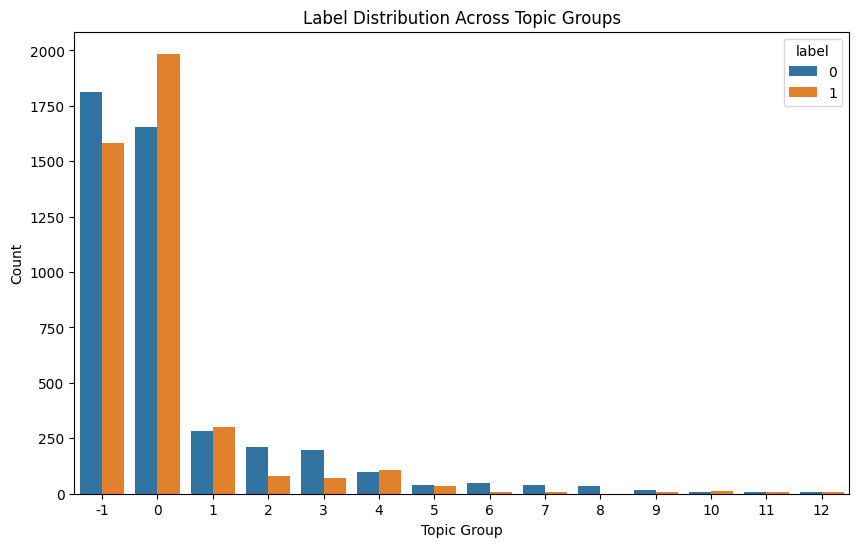

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='topic_group', y='count', hue='label')
plt.title('Label Distribution Across Topic Groups')
plt.xlabel('Topic Group')
plt.ylabel('Count')
plt.show()


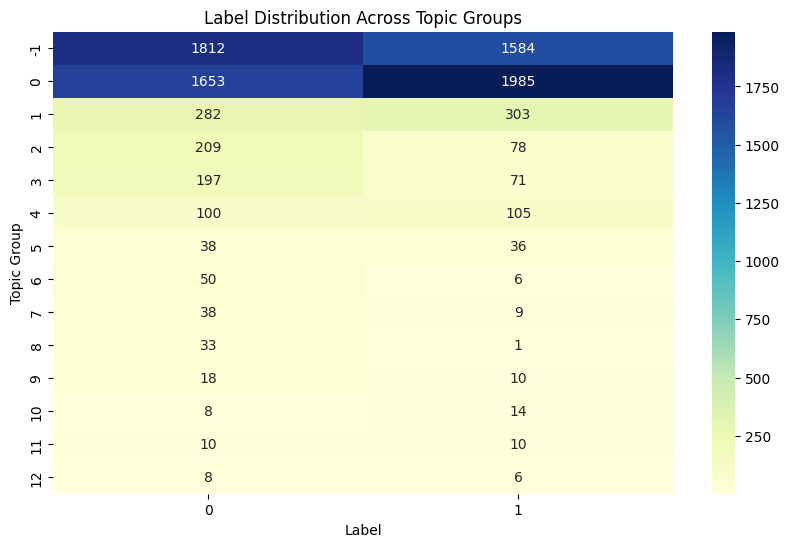

In [80]:
pivot_table = grouped_data.pivot_table(index='topic_group', columns='label', values='count', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Label Distribution Across Topic Groups')
plt.xlabel('Label')
plt.ylabel('Topic Group')
plt.show()


## Topic Modeling - NQTM

Sources:
- https://aclanthology.org/2020.emnlp-main.138/
- https://github.com/BobXWu/NQTM

To do this, activate the NQTM_venv environment first
- Unable to install dependencies :( 


In [84]:
# We first save the tweets to a text file
file_path = 'train_tweets/tweets.txt'

# Open the file in write mode and write the contents of the 'tweets' column
with open(file_path, 'w', encoding='utf-8') as file:
    for tweet in train_df['tweets']:
        file.write(tweet + '\n')

print("Tweets have been saved to", file_path)


Tweets have been saved to train_tweets/tweets.txt


In [87]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse

vectorizer = CountVectorizer()
tweets_vectorized = vectorizer.fit_transform(train_df['tweets'])

# Count Vectorization and Matrix Representation
bow_matrix = tweets_vectorized.toarray()

# Convert BoW matrix to sparse matrix
sparse_bow_matrix = scipy.sparse.csr_matrix(bow_matrix)

# Save sparse BoW matrix as .npz
scipy.sparse.save_npz('train_tweets/bow_matrix.npz', sparse_bow_matrix)

# Vocabulary (list of unique words)
vocab = vectorizer.get_feature_names_out()
with open('train_tweets/vocab.txt', 'w', encoding='utf-8') as file:
    for word in vocab:
        file.write(word + '\n')